<a href="https://www.analytiksinc.com">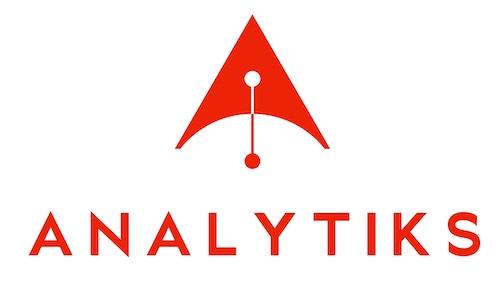</a>
<p style="text-align: right;"> © 2020. Analytiks Inc. </p>

# EXERCISE: Clustering Insurance Leads with Survey Results

Consider that you’re a marketing manager at an insurance firm and that you want to customize your offerings to suit the needs of your customers. You’ve decided to try out customer profiling and segmentation. After much thought, you decide on the two factors that you think the customers would value the most. Those are:
* A savings on premium paid
* The local availability of nearby insurance agents <br><br>

The importance of these factors will be measured using something called the “likert scale”, wherein a rating of 1 represents not important and a rating of 7 represent very important. 
You conduct the survey with 150 respondents.  The survey results are in a CSV file called “Survey Results.csv”
1. How many segments would you create?
2. Describe each segment you create in terms of the input variables
3. How would you target each customer segment?


## Import the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

#KMeans clustering Algorithm
from sklearn.cluster import KMeans

#Hierarchical clustering
from scipy.cluster import hierarchy

#PCA implementation in sklearn
from sklearn.decomposition import PCA

#StandardScaler
from sklearn.preprocessing import StandardScaler

#Simple Classification Algorithm 
from sklearn.linear_model import LogisticRegression

#Train Test Split Function for splitting datasets
from sklearn.model_selection import train_test_split

%matplotlib inline

## Load and Explore the Dataset

The file we'll be working with is called "Survey Results.csv"

In [21]:
df = pd.read_csv('../Datasets/Survey Results.csv', names=['Premium savings', 'Agent availability'], header=0)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Premium savings     150 non-null    int64
 1   Agent availability  150 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB


In [23]:
df.describe()

,Premium savings,Agent availability
count,150.000000,150.000000
mean,4.093333,4.046667
std,1.918986,2.014500
min,1.000000,1.000000
25%,3.000000,2.000000
50%,5.000000,5.000000
75%,6.000000,6.000000
max,7.000000,7.000000


In [24]:
df.head()

,Premium savings,Agent availability
0,5,5
1,6,7
2,6,5
3,6,6
4,5,6


## Train a Clustering Model

In [25]:
columns = df.columns
columns

Index(['Premium savings', 'Agent availability'], dtype='object')

<AxesSubplot:xlabel='Premium savings', ylabel='Agent availability'>

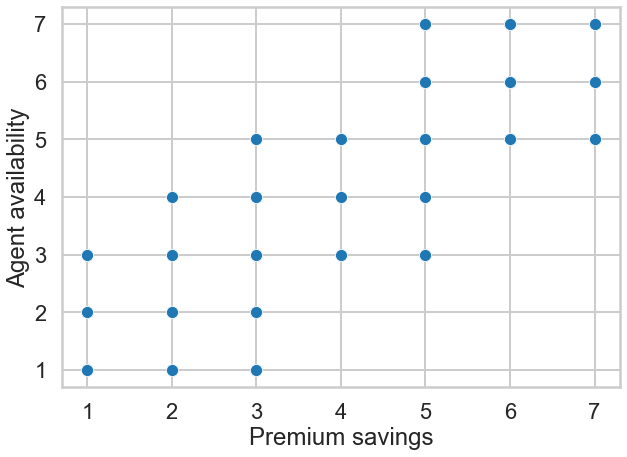

In [26]:
#Visualize/Plot the Sample Data
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x=columns[0], y=columns[1])

In [27]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=1)

#Fit to the data
kmeans.fit(df)

KMeans(max_iter=1000, n_clusters=3, random_state=1)

In [29]:
#Output of K-Means is the cluster label
k3_labels = kmeans.labels_

#Attach labels to the original DataFrame
df_k3 = df.copy()
df_k3['Label'] = k3_labels
df_k3.head()

,Premium savings,Agent availability,Label
0,5,5,1
1,6,7,1
2,6,5,1
3,6,6,1
4,5,6,1


In [30]:
#Check the size of each cluster
df_k3.Label.value_counts()

1    71
0    54
2    25
Name: Label, dtype: int64

## Visualize the Results

<AxesSubplot:xlabel='Premium savings', ylabel='Agent availability'>

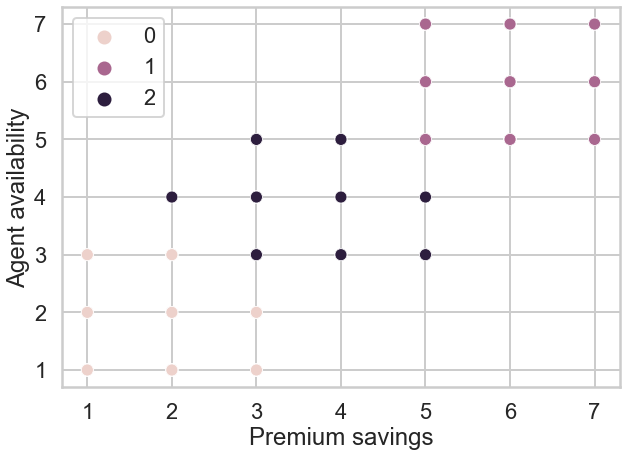

In [32]:
#Visualize/Plot the Sample Data
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_k3, x=columns[0], y=columns[1], hue=df_k3.Label.tolist())

## Analyze the Clusters

In [34]:
#Check the statistics on each cluster, this will help us "Profile" the clusters (Use a Pivot Table)
df_pivot = pd.pivot_table(df_k3, index = ['Label'], values = columns, 
               aggfunc=[np.mean,np.min, np.max])

df_pivot

mean                               amin                  \
      Agent availability Premium savings Agent availability Premium savings   
Label                                                                         
0               1.777778        2.037037                  1               1   
1               5.901408        5.830986                  5               5   
2               3.680000        3.600000                  3               2   

                    amax                  
      Agent availability Premium savings  
Label                                     
0                      3               3  
1                      7               7  
2                      5               5

In [37]:
df_pivot.sort_values(by=('mean', 'Agent availability'), ascending=False)

mean                               amin                  \
      Agent availability Premium savings Agent availability Premium savings   
Label                                                                         
1               5.901408        5.830986                  5               5   
2               3.680000        3.600000                  3               2   
0               1.777778        2.037037                  1               1   

                    amax                  
      Agent availability Premium savings  
Label                                     
1                      7               7  
2                      5               5  
0                      3               3

## How would you target the Clusters?

#### Cluster 1 ####
-
#### Cluster 2 ####
-
#### Cluster 0 ####
-